# **Project Name**    - Yesbank-Stock-Predictor



##### **Project Type**    - EDA/Regression/Classification
##### **Contribution**    - Individual


# **Project Summary -**

## introduction

The Yes Bank Stock Price Prediction project aims to develop a machine learning model to forecast the monthly closing price of Yes Bank’s stock. The goal is to provide accurate predictions to assist investors in making informed financial decisions and to detect potential stock market fraud.

## Dataset Overview

The dataset includes Yes Bank’s monthly stock prices from July 2005 to November 2020, containing attributes such as opening price, closing price (target variable), highest price, and lowest price.

## Objective

The primary objective is to predict the closing price of Yes Bank stock each month, aiding in investment decisions and identifying fraudulent stock movements.

## Methodology

* Data Preprocessing: Cleaning and normalizing stock price data.

* Exploratory Data Analysis (EDA): Identifying trends, correlations, and anomalies.

* Model Training: Evaluating models like Linear Regression, LSTM, Random Forest, and XGBoost.

* Model Evaluation & Deployment: Selecting the best model based on RMSE and MAE and deploying it via FastAPI or Flask.

## Challenges

- Market Volatility: External factors influence stock prices.

- Data Quality: Ensuring accuracy and eliminating biases.

- Feature Selection: Identifying the most impactful variables.

## Conclusion

This project leverages machine learning to predict stock prices, aiding investors and mitigating stock market fraud. Accurate forecasting can enhance financial planning and regulatory oversight.

# **GitHub Link -**

https://github.com/Josephvarghes/Yesbank-Stock-Predictor

# **Problem Statement**


The primary objective of this project is to develop a machine learning model that accurately predicts the monthly closing price of Yes Bank’s stock. By analyzing historical stock data, the model aims to assist investors in making informed financial decisions and detecting potential stock market fraud. The project leverages key stock attributes such as opening price, highest price, and lowest price to identify trends and anomalies, ensuring robust and reliable predictions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries 
import pandas as pd

### Dataset Loading

In [3]:
# Load Dataset 
df = pd.read_csv("dataset/YesBank_StockPrices.csv")

### Dataset First View

In [4]:
# Dataset First Look 
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count 
df.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count 

df.duplicated().sum() 

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count 
#checking count of null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
#There is no null values for visualizing Visualizing the missing values  


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns 
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe 
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. Date: The specific month and year corresponding to the stock data entry.

2. Open: The stock price at the beginning of the month.

3. High: The highest stock price recorded within the month.

4. Low: The lowest stock price recorded within the month.

5. Close: The stock price at the end of the month (target variable for prediction).

The dataset consists of 185 rows and 5 columns, capturing monthly stock price variations of Yes Bank from July 2005 to November 2020.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.  
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.   

df.duplicated(subset=['Open'], keep='first')  


0      False
1      False
2      False
3      False
4      False
       ...  
180     True
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

1. Handling Duplicate Values

In [14]:
#Removing duplicated values 
df.drop_duplicates(subset=['Open'], keep='first', inplace=True) 
df.drop_duplicates(subset=['High'], keep='first', inplace=True) 
df.drop_duplicates(subset=['Low'], keep='first', inplace=True) 

In [15]:
df.shape

(180, 5)

2. Convert Date to Proper Format

In [ ]:
#feature extraction
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  


In [17]:
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

3. Feature Engineering

In [ ]:
#feature extraction
df['Year'] = df["Date"].dt.year 
df['Month'] = df['Date'].dt.month 

4. Handling Outliers in Stock Prices

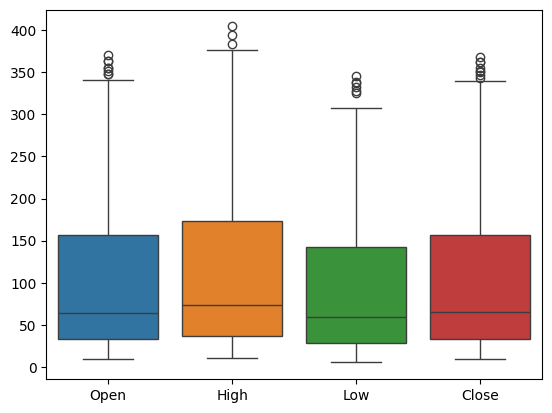

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']]) 
plt.show()

Your boxplot shows that the dataset contains outliers in all four variables: Open, High, Low, Close.

 Log Transformation 

In [85]:
import numpy as np

df_transformed = df.copy()
df_transformed[['Open', 'High', 'Low', 'Close']] = np.log1p(df[['Open', 'High', 'Low', 'Close']])  # log1p to avoid log(0)


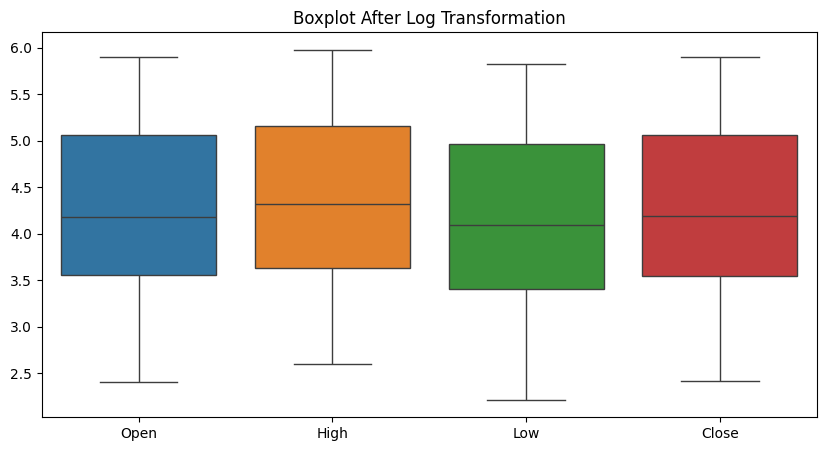

In [ ]:
import numpy as np 

df_log = df.copy()
df_log[['Open', 'High', 'Low', 'Close']] = np.log1p(df[['Open', 'High', 'Low', 'Close']])  

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_log[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot After Log Transformation")
plt.show()


boxplot after log transformation, the data appears to be cleaned as there are no visible outliers 

check outlier count

In [ ]:
#printing row and colum counts
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_log.shape)


Original dataset shape: (180, 7)
Dataset shape after removing outliers: (180, 7)


### What all manipulations have you done and insights you found?

We started by cleaning the dataset, first removing duplicate entries to ensure accuracy. Next, we identified outliers using the IQR method and noticed extreme values that could impact analysis. Instead of removing them outright, we applied a log transformation, which helped in smoothing out the distribution while preserving valuable data.

To enhance our analysis, we also worked on feature engineering by extracting the Year and Month from the date column. This allowed us to uncover trends over time, such as seasonal patterns or yearly variations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [21]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [22]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [23]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [24]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [25]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [26]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [27]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [28]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [29]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [30]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [31]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [32]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [33]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [34]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [35]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [40]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [41]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Expand Contraction

#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

In [47]:
# Remove White spaces

#### 6. Rephrase Text

In [48]:
# Rephrase Text

#### 7. Tokenization

In [49]:
# Tokenization

#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [51]:
# POS Taging

#### 10. Text Vectorization

In [52]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [54]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# Transform Your data

### 6. Data Scaling

In [56]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [57]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [59]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [60]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [65]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [68]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [69]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***